In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras import losses

import numpy as np
from keras import datasets  # mnist
from keras.utils import np_utils

import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance

Using TensorFlow backend.


In [2]:
import numpy as np
import xgboost as xgb
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline
import csv

In [3]:
train = pd.read_csv("C:\\Users\\munan\\Desktop\\contest\\train.csv", index_col=0)
test = pd.read_csv("C:\\Users\\munan\\Desktop\\contest\\test.csv", index_col=0)
submission = pd.read_csv("C:\\Users\\munan\\Desktop\\contest\\sample_submission.csv")

In [4]:
train['class_train'].value_counts()

2    157219
0    119996
1     42785
Name: class_train, dtype: int64

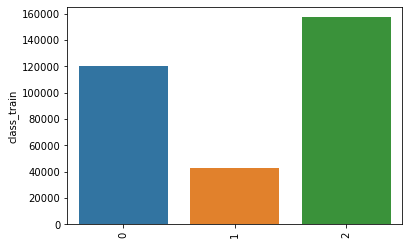

In [5]:
sns.barplot(train['class_train'].value_counts().index,train['class_train'].value_counts())
plt.xticks(rotation=90);

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320000 entries, 0 to 319999
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   u            320000 non-null  float64
 1   g            320000 non-null  float64
 2   r            320000 non-null  float64
 3   i            320000 non-null  float64
 4   z            320000 non-null  float64
 5   redshift     320000 non-null  float64
 6   dered_u      320000 non-null  float64
 7   dered_g      320000 non-null  float64
 8   dered_r      320000 non-null  float64
 9   dered_i      320000 non-null  float64
 10  dered_z      320000 non-null  float64
 11  nObserve     320000 non-null  int64  
 12  nDetect      320000 non-null  int64  
 13  airmass_u    320000 non-null  float64
 14  airmass_g    320000 non-null  float64
 15  airmass_r    320000 non-null  float64
 16  airmass_i    320000 non-null  float64
 17  airmass_z    320000 non-null  float64
 18  class_train  320000 non-

In [92]:
X = train.iloc[:,:18]
Y = train.iloc[:,18:]

In [93]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [94]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# 수치형 변수 mean_squared_error

In [7]:
rmse = lambda y,p :np.sqrt(mean_squared_error(y,p))

In [23]:
from sklearn.linear_model import LinearRegression

In [25]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [26]:
y_predicted = lr.predict(X_test)

In [27]:
print(f' RMSE:\t{rmse((y_test),y_predicted):12.2f}')

 RMSE:	        0.96


# 수치형 변수 log1p변환

In [28]:
rmlse = lambda y,p: np.sqrt(mean_squared_error(np.loglp(y),np.loglp(p)))

In [29]:
lr = LinearRegression()

In [32]:
lr.fit(X_train,np.log1p(y_train))
y_predicted = np.expm1(lr.predict(X_test))

In [35]:
print(f' RMSE:\t{rmse(y_test,y_predicted):12.2f}')
print(f' RLMSE:\t{rmse(y_test,y_predicted):12.2f}')

 RMSE:	12656533628037749896590855721363859333154463907312674197781460041347259315107423207626962472952020336640.00
 RLMSE:	12656533628037749896590855721363859333154463907312674197781460041347259315107423207626962472952020336640.00


# 수치형 변수 스케일링

In [36]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [44]:
scaler = StandardScaler()
x = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(X_test)

In [45]:
lr = LinearRegression()
lr.fit(x,np.log1p(y_train))
y_predicted = np.expm1(lr.predict(x_test))

In [46]:
print(f' RMSE:\t{rmse(y_test,y_predicted):12.2f}')
print(f' RLMSE:\t{rmse(y_test,y_predicted):12.2f}')

 RMSE:	197324778924584126183564661326162339475012563860282610608985518540695974653194141696.00
 RLMSE:	197324778924584126183564661326162339475012563860282610608985518540695974653194141696.00


# 수치형 변수 Binning

In [71]:
X_train['redshift_bin']= pd.qcut(X_train['redshift'],4,labels =False)

C:\Users\munan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


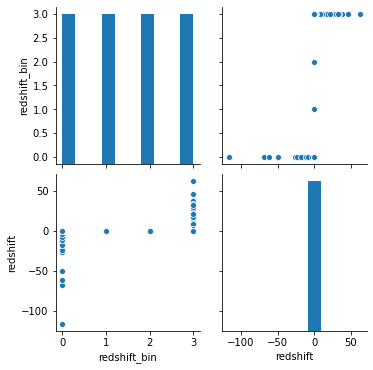

In [73]:
sns.pairplot(data= X_train,vars =['redshift_bin','redshift'])

# 수치형 변수 다항회귀

In [82]:
from sklearn.preprocessing import PolynomialFeatures

In [95]:
poly = PolynomialFeatures(2)
X_train= poly.fit_transform(X_train)

In [96]:
X_train.shape

(214400, 190)

In [98]:
poly = PolynomialFeatures(2)
X_test= poly.fit_transform(X_test)

In [99]:
lr = LinearRegression()
lr.fit(X_train,np.log1p(y_train))
y_predicted = np.expm1(lr.predict(X_test))

C:\Users\munan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in expm1
  This is separate from the ipykernel package so we can avoid doing imports until
